In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd

(100,)


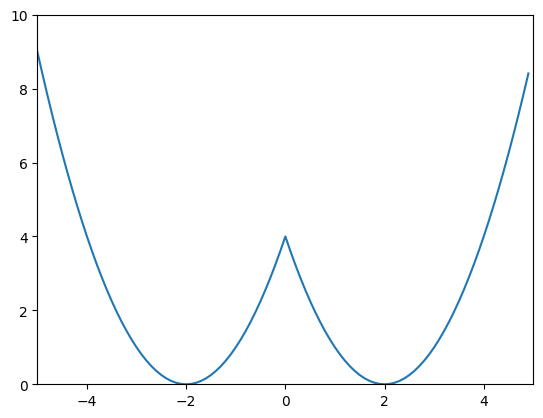

In [34]:
# This is the true unknown function we are trying to approximate
f = lambda x: ((np.abs(x)-2)**2).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)
print(f(x).shape)

plt.plot(x, f(x))
plt.axis([-5, 5, 0, 10])
plt.show()

In [35]:
# Define the kernel
def kernel(a, b):
    kernelParameter_l = 0.1
    kernelParameter_sigma = 1.0
    sqdist = (a**2).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)

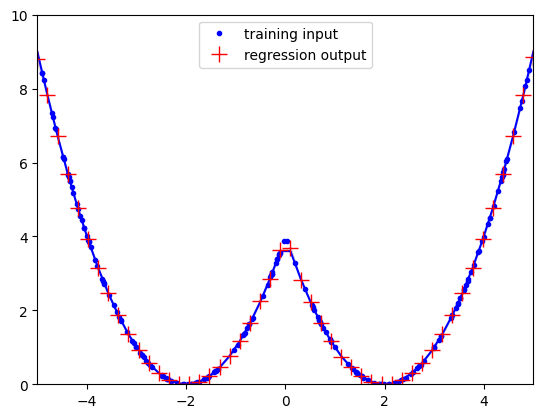

In [37]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
N = 200       # number of existing observation points (training points).
n = 50       # number of test points.
s = 0.00005    # noise variance.

X = np.random.uniform(-5, 5, size=(N,1))     # N training points 
y = f(X) + s*np.random.randn(N)
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))     # line 1 

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))   # k_star = kernel(X, Xtest), calculating v := l\k_star
mu = np.dot(Lk.T, np.linalg.solve(L, y))    # \alpha = np.linalg.solve(L, y) 

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)                  # k(x_star, x_star)        
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)   
s = np.sqrt(s2)

# # PLOTS:
# plt.figure(figsize=(16,8))

plt.clf()
plt.plot(X, y, 'b.', lw=2,label="training input")
plt.plot(Xtest, f(Xtest), 'b-')
plt.gca().fill_between(Xtest.flat, mu-2*s, mu+2*s, color="#dddddd")
plt.plot(Xtest, mu, 'r+', ms=12,label ="regression output")
# #plt.savefig('predictive.png', bbox_inches='tight', dpi=300)
# plt.title('Mean predictions plus 2 st.deviations')
plt.axis([-5, 5, 0, 10])
plt.legend(loc="upper center")
plt.show()
